# 第五章 人工智能药物发现初探（AIDD）

## 1.RDKit使用基础

### 1.2 分子读取

RDKit支持多种格式的分子文件读取，包括SMILES、SDF、Mol等格式。下面介绍如何从不同格式的文件中读取分子。

In [1]:
from rdkit import Chem
from rdkit import Chem
from rdkit import Chem

SMILES（Simplified Molecular Input Line Entry System）是一种简洁的分子表示法，可以通过SMILES字符串读取分子：

In [2]:
smiles = 'CC(=O)Oc1ccccc1C(=O)O'  # 阿司匹林的SMILES字符串
mol = Chem.MolFromSmiles(smiles)
Chem.MolToMolFile(mol,'./data/asp.mol')
print(Chem.MolToMolBlock(mol))  # 输出分子结构的MolBlock表示


     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0

Mol（Molfile）格式文件是常用的分子结构存储文件，可以在.Mol文件中记录单个或多个分子的立体结构信息、电荷信息以及其他信息。读取方式如下所示：

In [3]:
mol = Chem.MolFromMolFile('./data/asp.mol')
print(Chem.MolToMolBlock(mol))  # 输出分子结构的MolBlock表示


     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0

SDF（Structure Data File）是一种常用的分子文件格式，用于描述分子间相互作用力的文件格式,可以存储分子的结构、电荷、相互作用能等信息。SDF文件实际上包装了molfile（MDL Molfile）格式。多个化合物由由四个美元符号组成的线分隔。读取方式如下所示：

In [4]:
suppl = Chem.SDMolSupplier('./data/asp.sdf')
molecules = [mol for mol in suppl if mol is not None]
for mol in molecules:
    print(Chem.MolToMolBlock(mol))  # 输出每个分子的MolBlock表示

asp
     RDKit          2D

 13 13  0  0  0  0  0  0  0  0999 V2000
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2

### 1.3 分子绘制

RDKit提供了方便的分子绘制功能，可以将分子结构以图片形式显示。使用RDKit自带的绘图工具绘制分子如下所示：

In [5]:
from rdkit.Chem import Draw 

# 绘制分子
img = Draw.MolToImage(mol)
img.show()  # 显示分子图像

还可以自定义绘制参数，如分子图像大小、背景颜色等：

In [6]:
# 自定义绘制参数
options = Draw.DrawingOptions()
options.bgColor = (1, 1, 1)  # 设置背景颜色为白色

# 绘制分子
img = Draw.MolToImage(mol, options=options)
img.show()  # 显示分子图像

### 1.4 应用示例

下面通过一个具体的示例代码展示如何使用RDKit进行分子读取和绘制。首先使用Chem.MolFromSmiles函数从SMILES字符串中读取分子结构；随后，使用RDKit的描述符计算功能计算并打印分子的分子式、分子量和LogP值；最后使用Draw.MolToImage函数绘制分子图像并显示，并通过img.save函数将分子图像保存为图像文件。

In [7]:
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from rdkit.Chem.rdMolDescriptors import CalcMolFormula

# 读取SMILES字符串
smiles = 'CC(=O)Oc1ccccc1C(=O)O'  # 乙醇的SMILES字符串
mol = Chem.MolFromSmiles(smiles)

# 打印分子信息
print(f"分子名称: 阿司匹林")
print(f"分子式: {CalcMolFormula(mol)}")
print(f"分子量: {Chem.Descriptors.MolWt(mol):.2f}")
print(f"LogP: {Chem.Crippen.MolLogP(mol):.2f}")

# 绘制并显示分子
img = Draw.MolToImage(mol)
img.show()
img.save('aspirin.png')

分子名称: 阿司匹林
分子式: C9H8O4
分子量: 180.16
LogP: 1.31


## 2.分子描述符的计算

### 2.1 指纹提取

RDKit可以用于计算分子摩根分子指纹。首先使用Chem.MolFromSmiles函数从SMILES字符串中读取分子结构。随后构建一个二进制字典，使用GetMorganFingerprintAsBitVect函数计算分子的摩根分子指纹，并绘制指纹片段。

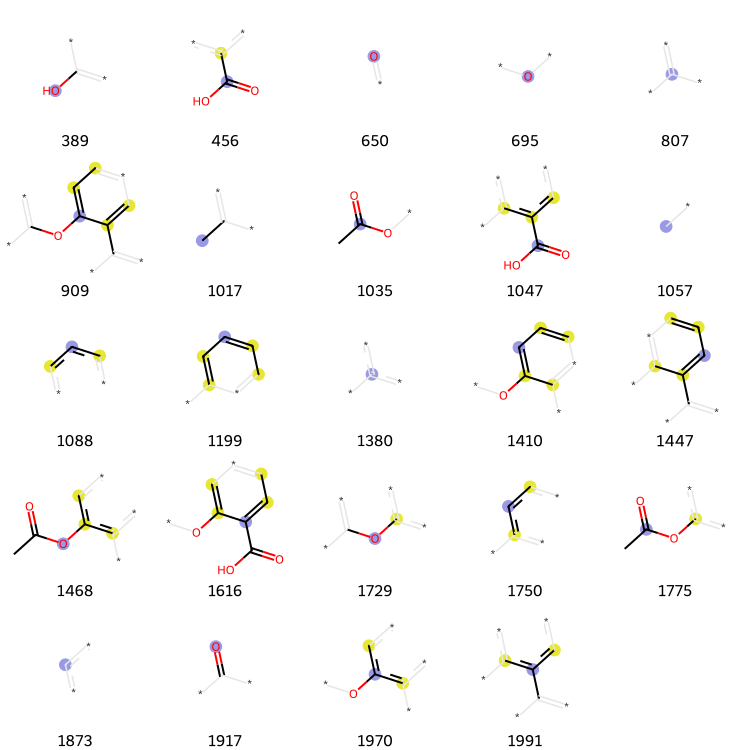

In [8]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors

mol = Chem.MolFromSmiles('CC(=O)Oc1ccccc1C(=O)O') #导入阿司匹林分子
bi = {} #创建一个二进制字典
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol,radius=2, bitInfo=bi)
tpls = [(mol,x,bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(tpls[:24], molsPerRow=5, legends=[str(x) for x in fp.GetOnBits()])

### 2.2 应用示例

下面通过一个具体的示例代码展示如何使用RDKit进行摩根分子指纹的提取和分子相似性计算。首先使用Chem.MolFromSmiles函数从SMILES字符串中读取分子结构。这一步骤将输入的一系列SMILES字符串转换为RDKit的分子对象，以便后续操作；随后，使用GetMorganFingerprintAsBitVect模块，依次计算候选分子的摩根分子指纹，并将计算得到的描述符结果存储在DataFrame表格中，通过这种方式，可以将结果组织成一个结构化的表格，便于进一步分子相似性。最后，通过TanimotoSimilarity函数，对分子相似性进行逐个对比，获得相似性矩阵。

In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

# 定义一组分子
smiles_list = ['CCO', 'CC(=O)O', 'c1ccccc1']
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# 生成Morgan指纹
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in molecules]

# 计算Tanimoto相似性
similarity_matrix = []
for i in range(len(fingerprints)):
    row = []
    for j in range(len(fingerprints)):
        similarity = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
        row.append(similarity)
    similarity_matrix.append(row)

# 显示相似性矩阵
import pandas as pd
df = pd.DataFrame(similarity_matrix, index=smiles_list, columns=smiles_list)
print(df)

               CCO   CC(=O)O  c1ccccc1
CCO       1.000000  0.181818  0.000000
CC(=O)O   0.181818  1.000000  0.111111
c1ccccc1  0.000000  0.111111  1.000000


## 3.定量构效关系研究

首先从ChemBL数据库(https://www.ebi.ac.uk/chembl)下载苯并异喹啉系列化合物的活性数据CSV文件（CHEMBL ID：4354796）。经过数据清理，去除模糊项，最终获得了17个具有明确活性的信息结构。这些结构为进一步的药物设计和构效关系研究提供了可靠的基础。该系列结构以及活性数据均引自文献来源于同一药理模型。数据详见./data/qsar_data.csv。

下述示例展示了如何使用RDKit和Scikit-learn构建苯并[de]异喹啉系列化合物QSAR模型。代码首先读取包含分子SMILES字符串和抑制活性pIC50值的CSV文件。然后采用RDKit库生成分子的摩根分子指纹。最后，代码将数据集分割为训练集和测试集，并使用多元线性回归算法对训练集数据进行拟合。主要步骤如下：

导入必要的库

In [10]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

读取示例分子数据（此处使用SMILES字符串和抑制活性pIC50值）

In [11]:
df = pd.read_csv('./data/qsar_data.csv')
df

,Smiles,IC50 (nM),pIC50
0,O=C1c2cccc3cccc(c23)C(=O)N1CCc1nc2cc(F)ccc2n1C...,287.00,6.54
1,Cc1cnc2c(c1)nc(CCN1C(=O)c3cccc4cccc(c34)C1=O)n...,23.00,7.64
2,COc1ccc(Cc2nccc3cc(OC)c(OC)cc23)cc1OC,1600.00,5.80
3,O=C1c2cccc3cccc(c23)C(=O)N1CCc1ccc2ccccc2n1,20.00,7.70
4,Cn1cc(-c2ccncc2)c(-c2ccc(OCc3ccc4ccccc4n3)cc2)n1,0.37,9.43
5,Cc1ccc2[nH]c(CCN3C(=O)c4cccc5cccc(c45)C3=O)nc2c1,2.10,8.68
6,COC1=CN(c2ccc(-n3cccn3)cc2F)N=C(c2ccnn2-c2cccc...,0.30,9.52
7,O=C1c2cccc3cccc(c23)C(=O)N1CCCSc1nc2ccccc2[nH]1,182.00,6.74
8,Cc1ccc2c(c1)nc(CCN1C(=O)c3cccc4cccc(c34)C1=O)n...,4700.00,5.33
9,Cc1cnc2c(c1)nc(CCN1C(=O)c3cccc4cccc(c34)C1=O)n...,1.00,9.00


生成Morgan指纹

In [12]:
def generate_morgan_fingerprint(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return list(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))
    else:
        return [0] * nBits

应用指纹生成函数到所有分子，将指纹展开为单独的列并将目标值加入指纹数据：

In [13]:
df['fingerprint'] = df['Smiles'].apply(lambda x: generate_morgan_fingerprint(x))
fingerprint_df = pd.DataFrame(df['fingerprint'].tolist())
data_with_fingerprints = pd.concat([df['pIC50'], fingerprint_df], axis=1)

把数据集分割成训练集（80%）和测试集（20%）：

In [14]:
X = np.array(data_with_fingerprints.drop(columns=['pIC50']))
y = np.array(data_with_fingerprints['pIC50'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

构建线性回归回归模型并拟合训练集数据：

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

对回归模型进行评估，分别计算训练集和测试集模型的均方根误差（Mean Squared Error，MSE）和决定系数（R2）：

In [16]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'训练集MSE: {mse_train:.2f}')
print(f'训练集R^2: {r2_train:.2f}')
print(f'测试集MSE: {mse_test:.2f}')
print(f'测试集R^2: {r2_test:.2f}')

训练集MSE: 0.63
训练集R^2: 0.59
测试集MSE: 0.88
测试集R^2: 0.50
